In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0,799,800)

In [3]:
y = torch.sin(2*3.1416*x/40)

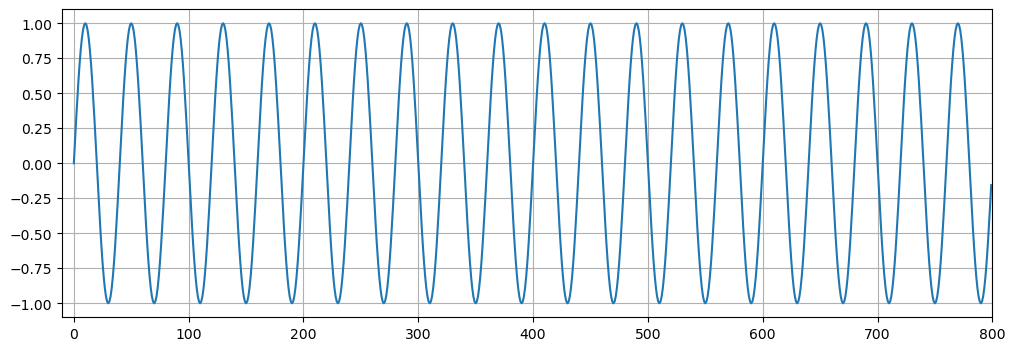

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10,800)
plt.grid(True)
plt.plot(y.numpy())
plt.show()

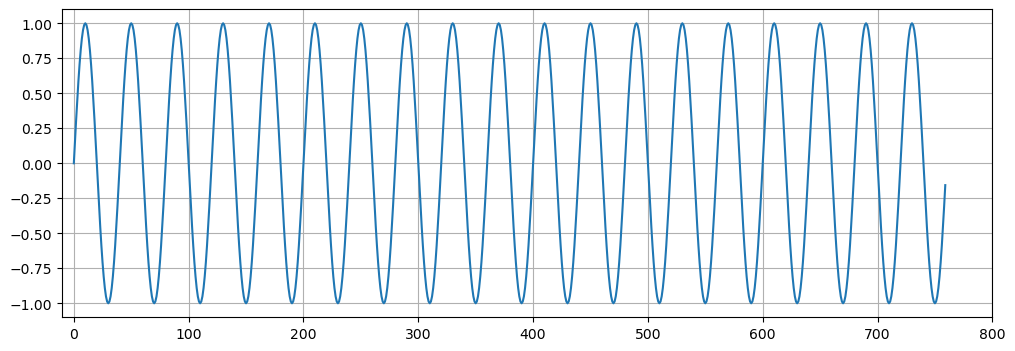

In [5]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]
plt.figure(figsize=(12,4))
plt.xlim(-10,800)
plt.grid(True)
plt.plot(train_set.numpy())
plt.show()

In [6]:
def input_data(seq, ws):
    out = [] #([0,1,2,3],[4])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out

In [7]:
window_size = 40

train_data = input_data(train_set, ws=window_size)

In [8]:
len(train_data)

720

In [32]:
idx = 719
train_set[idx:idx+40]

tensor([-1.5618e-01,  2.5969e-04,  1.5669e-01,  3.0927e-01,  4.5422e-01,
         5.8800e-01,  7.0729e-01,  8.0917e-01,  8.9113e-01,  9.5114e-01,
         9.8773e-01,  1.0000e+00,  9.8765e-01,  9.5097e-01,  8.9089e-01,
         8.0886e-01,  7.0692e-01,  5.8757e-01,  4.5375e-01,  3.0877e-01,
         1.5617e-01, -2.6859e-04, -1.5670e-01, -3.0928e-01, -4.5423e-01,
        -5.8800e-01, -7.0730e-01, -8.0918e-01, -8.9113e-01, -9.5114e-01,
        -9.8773e-01, -1.0000e+00, -9.8765e-01, -9.5097e-01, -8.9088e-01,
        -8.0886e-01, -7.0691e-01, -5.8756e-01, -4.5374e-01, -3.0876e-01])

In [28]:
train_set[idx+40:idx+40+1]

tensor([1.4480e-05])

In [44]:
train_set[759:759+10]

tensor([-0.1562])

In [45]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [46]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [47]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [49]:
train_data[0][0].view(len(train_data[0][0]),1,-1).shape

torch.Size([40, 1, 1])

Epoch:0, loss:0.09212876856327057
Performance on test range: 0.6071590185165405


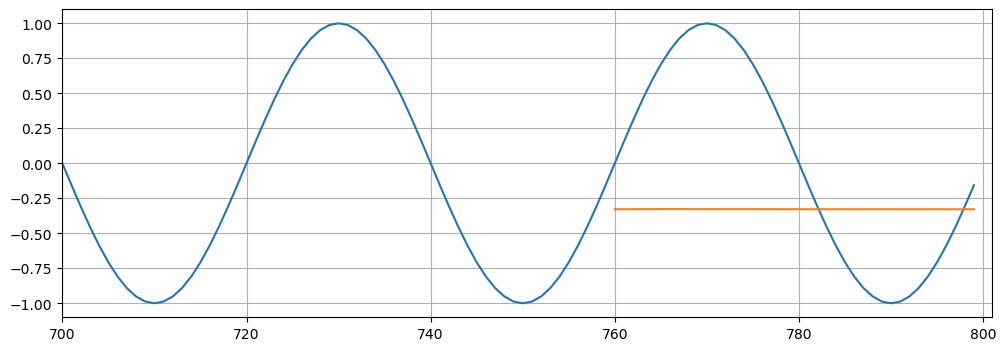

Epoch:1, loss:0.06506765633821487
Performance on test range: 0.5650987029075623


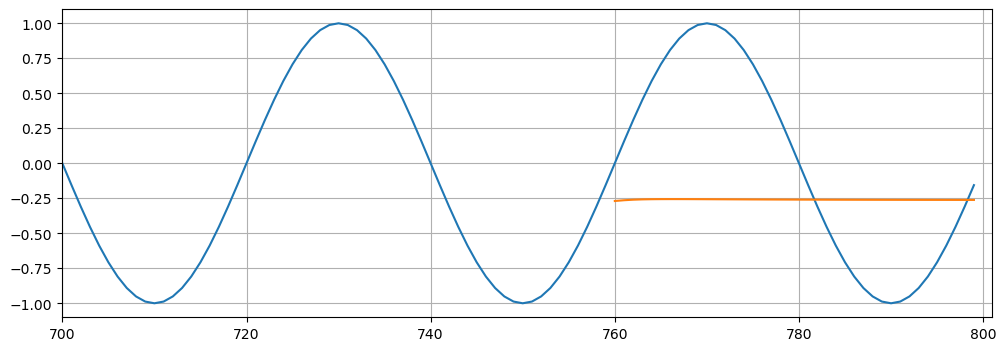

Epoch:2, loss:0.04198049008846283
Performance on test range: 0.5199716091156006


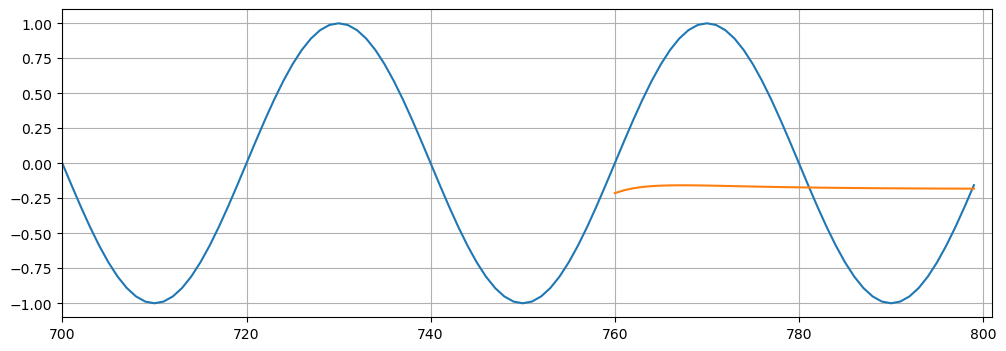

Epoch:3, loss:0.017842764034867287
Performance on test range: 0.42209967970848083


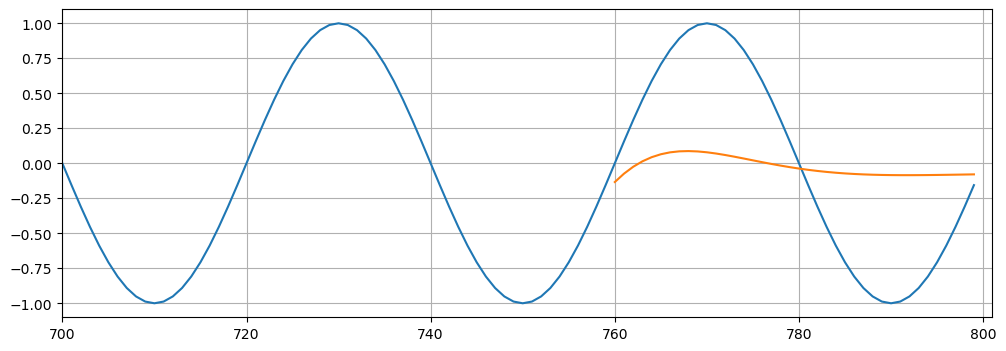

Epoch:4, loss:0.0028870967216789722
Performance on test range: 0.16624118387699127


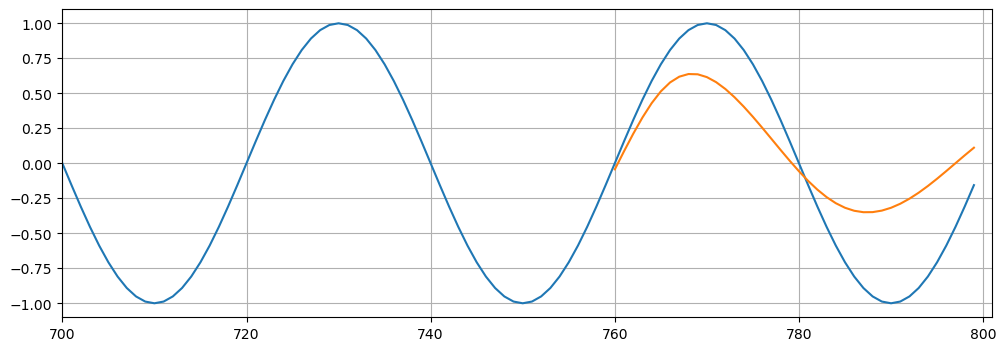

Epoch:5, loss:0.0003200779319740832
Performance on test range: 0.030554357916116714


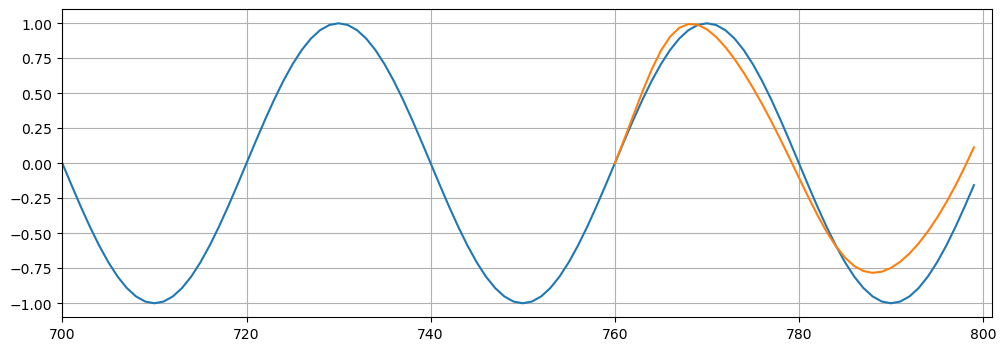

Epoch:6, loss:0.00012969104864168912
Performance on test range: 0.014990223571658134


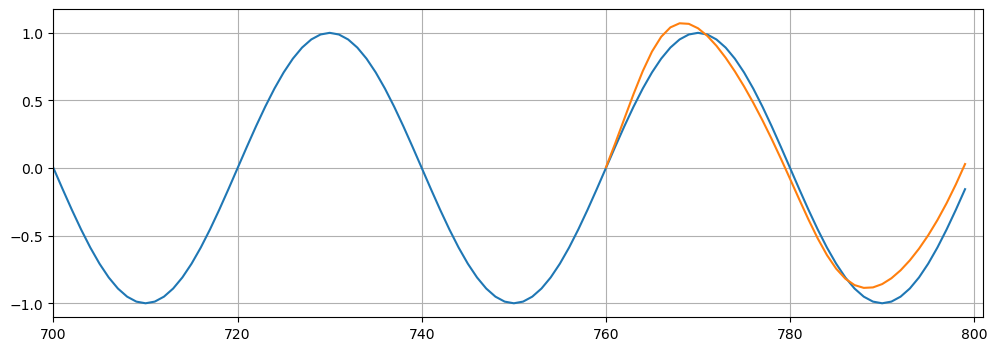

Epoch:7, loss:0.00012006635370198637
Performance on test range: 0.011856645345687866


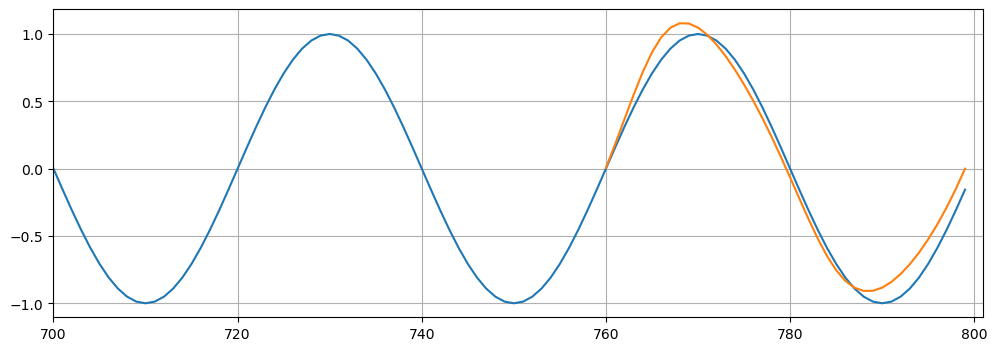

Epoch:8, loss:0.00012655554746743292
Performance on test range: 0.010163825936615467


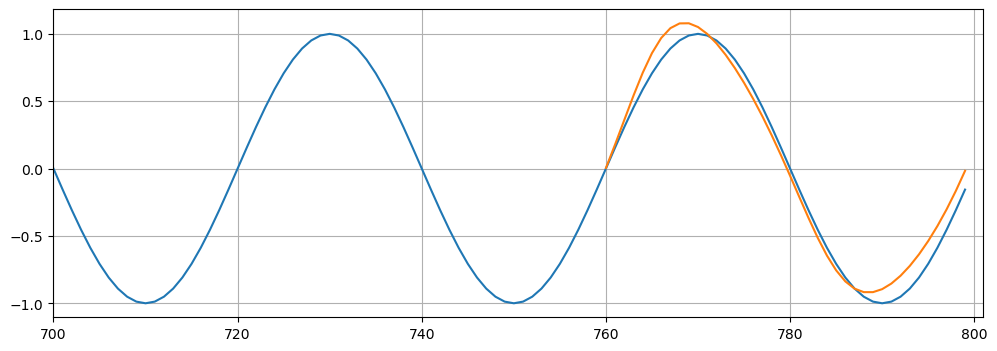

Epoch:9, loss:0.00013195440988056362
Performance on test range: 0.008897621184587479


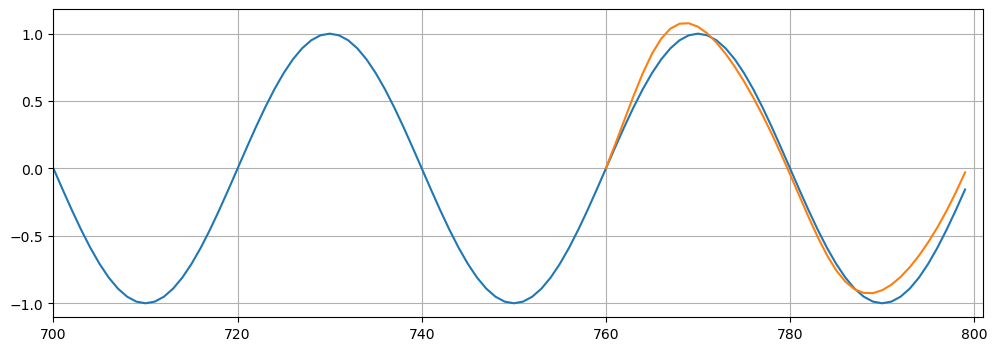

In [55]:
epochs = 10
future = 40

for i in range(epochs):
    #training
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch:{i}, loss:{loss.item()}")
    
    #prediction
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    
     #graphics
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800), preds[window_size:])
    plt.show()


In [52]:
torch.tensor([4.0]).item()

4.0

In [53]:
train_set.shape

torch.Size([760])

In [57]:
epochs = 15
window_size = 40
all_data = input_data(y, window_size)

In [56]:
y.shape

torch.Size([800])

In [58]:
len(all_data)

760

In [59]:
import time
start_time = time.time()


for i in range(epochs):
    #training
    for seq, y_train in all_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch:{i}, loss:{loss.item()}")
    
total_time = time.time() - start_time
print(total_time/60)

Epoch:0, loss:0.0001345303317066282
Epoch:1, loss:0.00013443011266645044
Epoch:2, loss:0.00013231892080511898
Epoch:3, loss:0.00012879692076239735
Epoch:4, loss:0.00012434215750545263
Epoch:5, loss:0.00011931286280741915
Epoch:6, loss:0.00011398167407605797
Epoch:7, loss:0.00010854088759515435
Epoch:8, loss:0.00010312810627510771
Epoch:9, loss:9.784108260646462e-05
Epoch:10, loss:9.274225158151239e-05
Epoch:11, loss:8.787704427959397e-05
Epoch:12, loss:8.325872477144003e-05
Epoch:13, loss:7.890000415500253e-05
Epoch:14, loss:7.480505882995203e-05
0.17206685940424601


In [63]:
#Forecast into unknown future
preds = y[-window_size:].tolist()
for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())

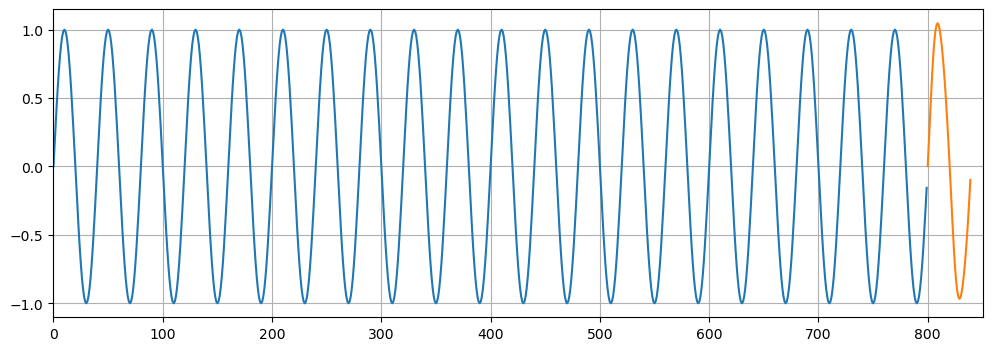

In [66]:
plt.figure(figsize=(12,4))
plt.xlim(0,851)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future), preds[window_size:])
plt.show()

In [154]:
import pandas as pd
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#This relates to plotting datetime values with matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [124]:
df = pd.read_csv('./Alcohol_Sales.csv', index_col=0, parse_dates=True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [125]:
df.shape

(325, 1)

In [126]:
df = df.dropna()

In [127]:
df.shape

(325, 1)

<Axes: xlabel='DATE'>

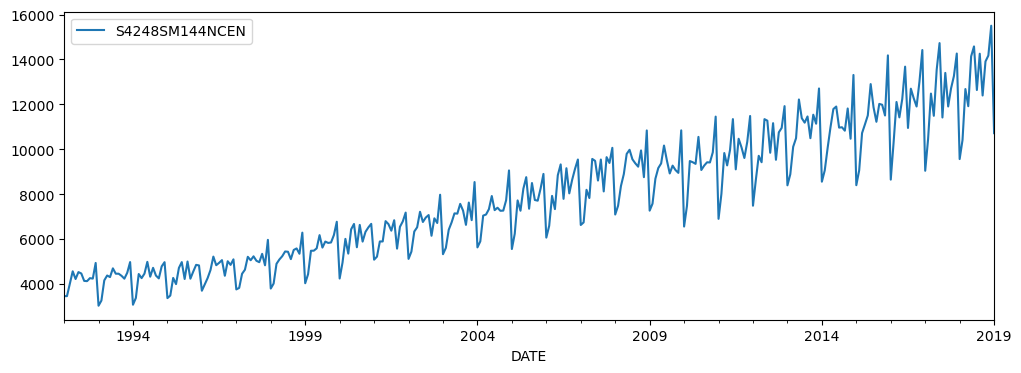

In [128]:
df.plot(figsize=(12,4))

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [130]:
y = df['S4248SM144NCEN'].values.astype(float)
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [131]:
test_size = 12
train_set = y[:-test_size]
test_set = y[-test_size:]

In [132]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [135]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [136]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [137]:
train_norm.shape

(313, 1)

In [138]:
len(y) - test_size - window_size

301

In [139]:
train_norm = scaler.transform(train_set.reshape(-1,1))
train_norm = torch.FloatTensor(train_norm).view(-1)
train_norm.shape

torch.Size([313])

In [140]:
window_size = 12

In [141]:
def input_data(seq, ws):
    out = [] #([0,1,2,3],[4])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out

In [142]:
train_data = input_data(train_norm, window_size)
len(train_data)

301

In [143]:
class LSTMnetwork(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, out_size)
        
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [144]:
torch.manual_seed(101)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [145]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [146]:
epochs = 1000
import time
start_time = time.time()

for i in range(epochs):
    #training
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch:{i}, loss:{loss.item()}")
    
total_time = time.time()-start_time
print(f"Time to train:{total_time/60} minutes")

Epoch:0, loss:0.3033113479614258
Epoch:1, loss:0.3348945379257202
Epoch:2, loss:0.3066955506801605
Epoch:3, loss:0.2849098742008209
Epoch:4, loss:0.2742384672164917
Epoch:5, loss:0.2723434567451477
Epoch:6, loss:0.2711827754974365
Epoch:7, loss:0.27045249938964844
Epoch:8, loss:0.269727498292923
Epoch:9, loss:0.2702290415763855
Epoch:10, loss:0.2660760283470154
Epoch:11, loss:0.25650012493133545
Epoch:12, loss:0.2551530599594116
Epoch:13, loss:0.24988846480846405
Epoch:14, loss:0.24654851853847504
Epoch:15, loss:0.24231146275997162
Epoch:16, loss:0.23683717846870422
Epoch:17, loss:0.22931699454784393
Epoch:18, loss:0.21581538021564484
Epoch:19, loss:0.20378102362155914
Epoch:20, loss:0.17792744934558868
Epoch:21, loss:0.15027911961078644
Epoch:22, loss:0.16664043068885803
Epoch:23, loss:0.0844186544418335
Epoch:24, loss:0.06572720408439636
Epoch:25, loss:9.041309567692224e-07
Epoch:26, loss:0.004282246343791485
Epoch:27, loss:0.003934602253139019
Epoch:28, loss:0.004699458833783865
Epo

Epoch:222, loss:0.00026400218484923244
Epoch:223, loss:0.00036588276270776987
Epoch:224, loss:0.00047280307626351714
Epoch:225, loss:0.0005174512043595314
Epoch:226, loss:0.00038223524461500347
Epoch:227, loss:0.00036763036041520536
Epoch:228, loss:0.000289950636215508
Epoch:229, loss:6.208128615980968e-05
Epoch:230, loss:0.000375553616322577
Epoch:231, loss:0.00014553368964698166
Epoch:232, loss:0.00019421889737714082
Epoch:233, loss:0.0001230810594279319
Epoch:234, loss:0.0004479454946704209
Epoch:235, loss:0.00016030212282203138
Epoch:236, loss:7.45877914596349e-05
Epoch:237, loss:1.010219693853287e-05
Epoch:238, loss:0.0023147498723119497
Epoch:239, loss:1.1473512984139234e-07
Epoch:240, loss:0.0015372767811641097
Epoch:241, loss:0.00046388403279706836
Epoch:242, loss:0.00021652643044944853
Epoch:243, loss:0.00019684346625581384
Epoch:244, loss:5.266825974103995e-05
Epoch:245, loss:3.5979862786916783e-06
Epoch:246, loss:9.76068690761167e-07
Epoch:247, loss:4.9092137487605214e-05
Ep

Epoch:437, loss:3.2166824439627817e-06
Epoch:438, loss:0.0002641794562805444
Epoch:439, loss:0.000746040721423924
Epoch:440, loss:5.68289415525669e-09
Epoch:441, loss:0.0012455341638997197
Epoch:442, loss:0.0008071252959780395
Epoch:443, loss:0.0008330274722538888
Epoch:444, loss:0.0008374873432330787
Epoch:445, loss:0.0008933956851251423
Epoch:446, loss:0.000658258970361203
Epoch:447, loss:0.00022509547125082463
Epoch:448, loss:9.828391921473667e-05
Epoch:449, loss:2.12222475965973e-05
Epoch:450, loss:1.1139917660329957e-05
Epoch:451, loss:6.779841351089999e-05
Epoch:452, loss:8.024077396839857e-05
Epoch:453, loss:0.0001320309384027496
Epoch:454, loss:0.00023390029673464596
Epoch:455, loss:0.00021213875152170658
Epoch:456, loss:0.0003008646599482745
Epoch:457, loss:0.00025570904836058617
Epoch:458, loss:0.00010589998419163749
Epoch:459, loss:1.4345684576255735e-05
Epoch:460, loss:1.2342484296823386e-05
Epoch:461, loss:0.0002173989050788805
Epoch:462, loss:0.0006947575602680445
Epoch:4

Epoch:651, loss:0.0002975373645313084
Epoch:652, loss:1.7095625253205071e-06
Epoch:653, loss:3.7259005694068037e-06
Epoch:654, loss:0.0002048049500444904
Epoch:655, loss:9.009426321426872e-06
Epoch:656, loss:9.350324944534805e-06
Epoch:657, loss:2.947662665064854e-07
Epoch:658, loss:1.2714664308077772e-06
Epoch:659, loss:3.5465313885651994e-06
Epoch:660, loss:7.108067075023428e-05
Epoch:661, loss:0.0009958584560081363
Epoch:662, loss:0.00044172588968649507
Epoch:663, loss:0.0006405984750017524
Epoch:664, loss:0.0002801852533593774
Epoch:665, loss:8.77378333825618e-05
Epoch:666, loss:4.529036061740044e-07
Epoch:667, loss:0.0006108871311880648
Epoch:668, loss:0.00013818485604133457
Epoch:669, loss:4.5796688937116414e-05
Epoch:670, loss:0.0012626907555386424
Epoch:671, loss:0.000514243496581912
Epoch:672, loss:9.912136192724574e-06
Epoch:673, loss:0.00010695684613892809
Epoch:674, loss:2.7280024369247258e-05
Epoch:675, loss:0.0005927302991040051
Epoch:676, loss:7.133940471248934e-06
Epoch

Epoch:866, loss:1.3952606423117686e-05
Epoch:867, loss:0.0001041814248310402
Epoch:868, loss:2.4251345166703686e-05
Epoch:869, loss:0.00014712965639773756
Epoch:870, loss:2.7642661734716967e-05
Epoch:871, loss:0.0003484509652480483
Epoch:872, loss:1.51949436144605e-07
Epoch:873, loss:0.0008494090288877487
Epoch:874, loss:0.00025326275499537587
Epoch:875, loss:8.457967487629503e-05
Epoch:876, loss:3.0911895009921864e-05
Epoch:877, loss:5.261658225208521e-05
Epoch:878, loss:5.5135202273959294e-05
Epoch:879, loss:5.524678999790922e-05
Epoch:880, loss:9.650186257204041e-06
Epoch:881, loss:3.1082301575224847e-05
Epoch:882, loss:2.2214255295693874e-05
Epoch:883, loss:0.00010834800195880234
Epoch:884, loss:5.416055728346691e-07
Epoch:885, loss:6.821130227763206e-05
Epoch:886, loss:7.379331509582698e-05
Epoch:887, loss:3.786640809266828e-05
Epoch:888, loss:4.720674769487232e-05
Epoch:889, loss:2.0324379875091836e-05
Epoch:890, loss:4.900207568425685e-05
Epoch:891, loss:0.00018286622071173042
E

In [147]:
#Forecast into unknown future
future=12
preds = train_norm[-window_size:].tolist()
model.eval()

for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())

In [148]:
preds[window_size:]

[0.34363648295402527,
 0.632965087890625,
 0.45726972818374634,
 0.8309348821640015,
 1.0344817638397217,
 0.402753084897995,
 0.7939857244491577,
 0.4899502992630005,
 0.6698127388954163,
 0.7656060457229614,
 0.9246922135353088,
 0.3644126057624817]

In [107]:
inp = [torch.randn(1, 3) for _ in range(5)]
inp

[tensor([[-0.4484,  0.0789,  0.2088]]),
 tensor([[0.1923, 2.2161, 0.9451]]),
 tensor([[0.5898, 0.0918, 0.1487]]),
 tensor([[-1.2560,  0.0618, -0.3111]]),
 tensor([[ 0.3720, -0.7122, -1.0269]])]

In [111]:
for i in inp:
    print(i.view(1,1,-1))

tensor([[[-0.4484,  0.0789,  0.2088]]])
tensor([[[0.1923, 2.2161, 0.9451]]])
tensor([[[0.5898, 0.0918, 0.1487]]])
tensor([[[-1.2560,  0.0618, -0.3111]]])
tensor([[[ 0.3720, -0.7122, -1.0269]]])


In [149]:
true_preds = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))
true_preds

array([[10890.60160704],
       [12583.02928162],
       [11555.29927501],
       [13741.05359322],
       [14931.70107758],
       [11236.40417011],
       [13524.91949517],
       [11746.46427554],
       [12798.56961617],
       [13358.91256446],
       [14289.48710307],
       [11012.13153741]])

In [116]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [150]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]')
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [151]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

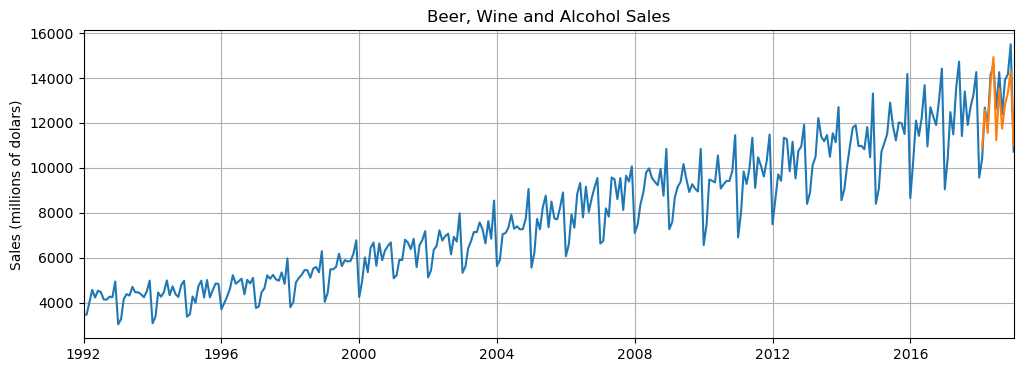

In [152]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dolars)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x, true_preds)
plt.show()

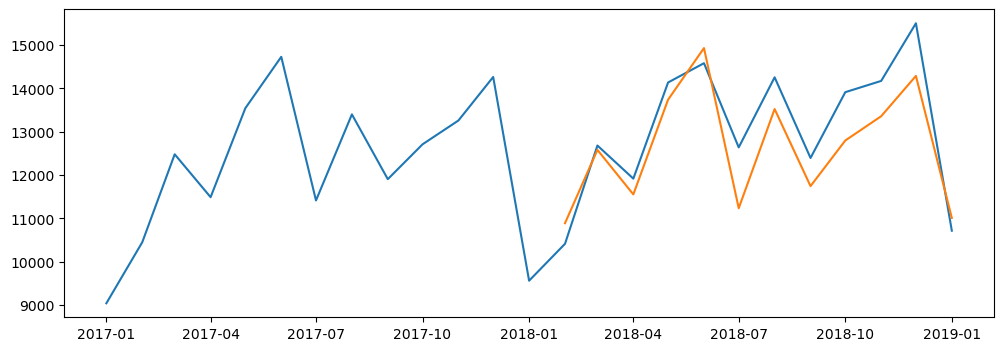

In [158]:
#Select the end of the graph with slice notation
plt.figure(figsize=(12,4))
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x, true_preds)
plt.show()

In [168]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [169]:
true_preds

array([[10682.18922375],
       [12423.19393501],
       [11901.72384283],
       [13978.52552229],
       [13389.54176572],
       [11331.01025541],
       [13209.66803411],
       [12060.08715802],
       [12581.25914815],
       [13721.80491716],
       [11993.66374522],
       [10326.33251528]])

In [161]:
df['S4248SM144NCEN']

DATE
1992-01-01     3459
1992-02-01     3458
1992-03-01     4002
1992-04-01     4564
1992-05-01     4221
              ...  
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, Length: 325, dtype: int64

In [171]:
epochs = 500
window_size = 12

model.train()

train_norm = scaler.fit_transform(y.reshape(-1,1))
train_norm = torch.FloatTensor(train_norm).view(-1)
all_data = input_data(train_norm, window_size)

import time
start_time = time.time()

for i in range(epochs):
    #training
    for seq, y_train in all_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch:{i+1:2}, loss:{loss.item():10.8f}")
    
total_time = time.time()-start_time
print(f"Time to train:{total_time/60} minutes")

Epoch: 1, loss:0.00540497
Epoch: 2, loss:0.00559356
Epoch: 3, loss:0.00561212
Epoch: 4, loss:0.00290192
Epoch: 5, loss:0.00077248
Epoch: 6, loss:0.00008628
Epoch: 7, loss:0.00077719
Epoch: 8, loss:0.00483577
Epoch: 9, loss:0.00000961
Epoch:10, loss:0.00009200
Epoch:11, loss:0.00026161
Epoch:12, loss:0.00016052
Epoch:13, loss:0.00017137
Epoch:14, loss:0.00000480
Epoch:15, loss:0.00001024
Epoch:16, loss:0.00049551
Epoch:17, loss:0.00149381
Epoch:18, loss:0.00021796
Epoch:19, loss:0.00070172
Epoch:20, loss:0.00038970
Epoch:21, loss:0.00066976
Epoch:22, loss:0.00138559
Epoch:23, loss:0.00022759
Epoch:24, loss:0.00005396
Epoch:25, loss:0.00003093
Epoch:26, loss:0.00017075
Epoch:27, loss:0.00028364
Epoch:28, loss:0.00056760
Epoch:29, loss:0.00003067
Epoch:30, loss:0.00002702
Epoch:31, loss:0.00000564
Epoch:32, loss:0.00001212
Epoch:33, loss:0.00002882
Epoch:34, loss:0.00090335
Epoch:35, loss:0.00116302
Epoch:36, loss:0.00055235
Epoch:37, loss:0.00000097
Epoch:38, loss:0.00225942
Epoch:39, lo

Epoch:309, loss:0.00197894
Epoch:310, loss:0.00101956
Epoch:311, loss:0.00113505
Epoch:312, loss:0.00007334
Epoch:313, loss:0.00002386
Epoch:314, loss:0.00001094
Epoch:315, loss:0.00001839
Epoch:316, loss:0.00009406
Epoch:317, loss:0.00000572
Epoch:318, loss:0.00002775
Epoch:319, loss:0.00001064
Epoch:320, loss:0.00008282
Epoch:321, loss:0.00200688
Epoch:322, loss:0.00214061
Epoch:323, loss:0.00002221
Epoch:324, loss:0.00000122
Epoch:325, loss:0.00004977
Epoch:326, loss:0.00015657
Epoch:327, loss:0.00005297
Epoch:328, loss:0.00000145
Epoch:329, loss:0.00084690
Epoch:330, loss:0.00000744
Epoch:331, loss:0.00038917
Epoch:332, loss:0.00001016
Epoch:333, loss:0.00013979
Epoch:334, loss:0.00003623
Epoch:335, loss:0.00003428
Epoch:336, loss:0.00009995
Epoch:337, loss:0.00002441
Epoch:338, loss:0.00001448
Epoch:339, loss:0.00001241
Epoch:340, loss:0.00099406
Epoch:341, loss:0.00001608
Epoch:342, loss:0.00000447
Epoch:343, loss:0.00027896
Epoch:344, loss:0.00098323
Epoch:345, loss:0.00042030
E

In [172]:
#Forecast into unknown future
future=12
window_size = 12
preds = train_norm[-window_size:].tolist()
model.eval()

for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())

In [173]:
true_preds = scaler.inverse_transform(np.array(preds).reshape(-1,1))

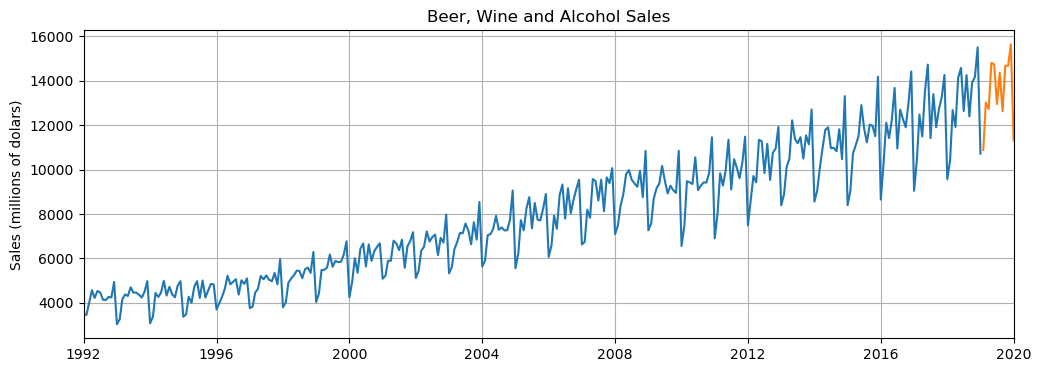

In [175]:
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]')
plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dolars)')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x, true_preds[window_size:])
plt.show()

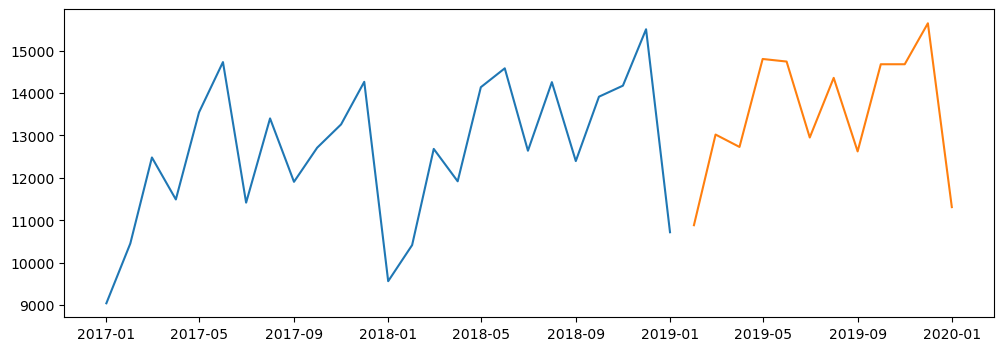

In [176]:
#Select the end of the graph with slice notation
plt.figure(figsize=(12,4))
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x, true_preds[window_size:])
plt.show()